In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [56]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\archive (13)\SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
#Check for null values
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [4]:
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
#Duplicates
df.duplicated().sum()

0

# Find out the 10 least popular songs in spotify?

In [6]:
least_popular_song = df.sort_values('popularity', ascending=True)
least_popular_song.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
74954,Children's Music,Sing n Play,"See, See My Playmate",3WaCwwpGoxLEkFmd6cpZO5,0,0.1390,0.556,150487,0.4390,0.006400,D,0.1720,-11.604,Major,0.0288,165.306,4/4,0.820
74958,Children's Music,Children Songs Company,By the God - Instrumental,5yDehr9ccZo3vBO8hZXFcK,0,0.2130,0.736,212547,0.4460,0.821000,D,0.2980,-12.328,Major,0.0504,130.011,4/4,0.668
74959,Children's Music,Children Songs Company,Interruption Please - Instrumental,6NEULw7AmTOAYRunPWcFvn,0,0.0131,0.639,184000,0.8440,0.095700,A#,0.0399,-8.582,Minor,0.0439,120.027,4/4,0.271
74961,Children's Music,Children Songs Company,Breeze,6v126eNn1A79yFIKGfvqLz,0,0.0280,0.607,147653,0.5540,0.000000,A,0.1690,-10.571,Major,0.3710,92.193,4/4,0.404
74962,Children's Music,Children Songs Company,Woodland,7qR2PWbDeuhh1Vzd0anb25,0,0.9950,0.529,266067,0.1540,0.414000,B,0.1230,-9.222,Minor,0.0470,69.588,4/4,0.332
74963,Children's Music,Children Songs Company,Cool Me - Instrumental,0V3Q9RYUaiLKTJIvg4KCST,0,0.2500,0.623,350080,0.4710,0.931000,A#,0.2580,-8.675,Major,0.0332,120.015,4/4,0.515
74964,Children's Music,Sing n Play,The Tortoise and the Hare,0oX193rf5y87RipsZnH8Pq,0,0.4960,0.563,201362,0.3460,0.000000,D,0.1200,-14.058,Major,0.0938,144.642,4/4,0.370
56153,Movie,Bruno Pelletier,Lié par le sang,3GO9Wo14FvMXvOKE4LItjg,0,0.0294,0.656,276027,0.6940,0.000017,A,0.0527,-6.755,Major,0.0273,120.085,4/4,0.449
74966,Children's Music,Children Songs Company,Forsaken,1rRNU87xfqvxiUsEXXyi8k,0,0.9940,0.429,129387,0.0382,0.000000,B,0.4480,-12.704,Major,0.0557,156.807,3/4,0.474


# Descriptive statistics

In [7]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


# Find out the most popular songs which are greater than 90

In [8]:
Most_popular = df.query("popularity>90", inplace=False).sort_values("popularity", ascending=False)
Most_popular.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
138918,Reggaeton,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
66643,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.5560,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913


In [9]:
Most_popular[:10]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
138918,Reggaeton,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
66643,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.5560,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913


# Dealing with date

In [10]:
df.set_index("release_date", inplace=True)
df.index = pd.to_datetime("df.index")
df.head()

KeyError: "None of ['release_date'] are in the columns"

In [11]:
#Let's say if I want to check the name of artist in 18th column

df[["artist_name"]].iloc[18]

artist_name    Henri Salvador
Name: 18, dtype: object

# Converting duration_ms to seconds

In [12]:
df["duration"] = df["duration_ms"].apply(lambda x: round(x/1000))
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,99
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,137
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,170
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,152
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962,326
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,282
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813,167
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489,222


# Correlation

In [13]:
df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076,0.002347
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798,0.011200
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154,-0.125781
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811,0.999997
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771,-0.030545
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522,0.076017
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804,0.023791
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901,-0.047614
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842,-0.016161
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857,-0.028447


Text(0.5, 1.0, 'CORRELATION MATRIX ')

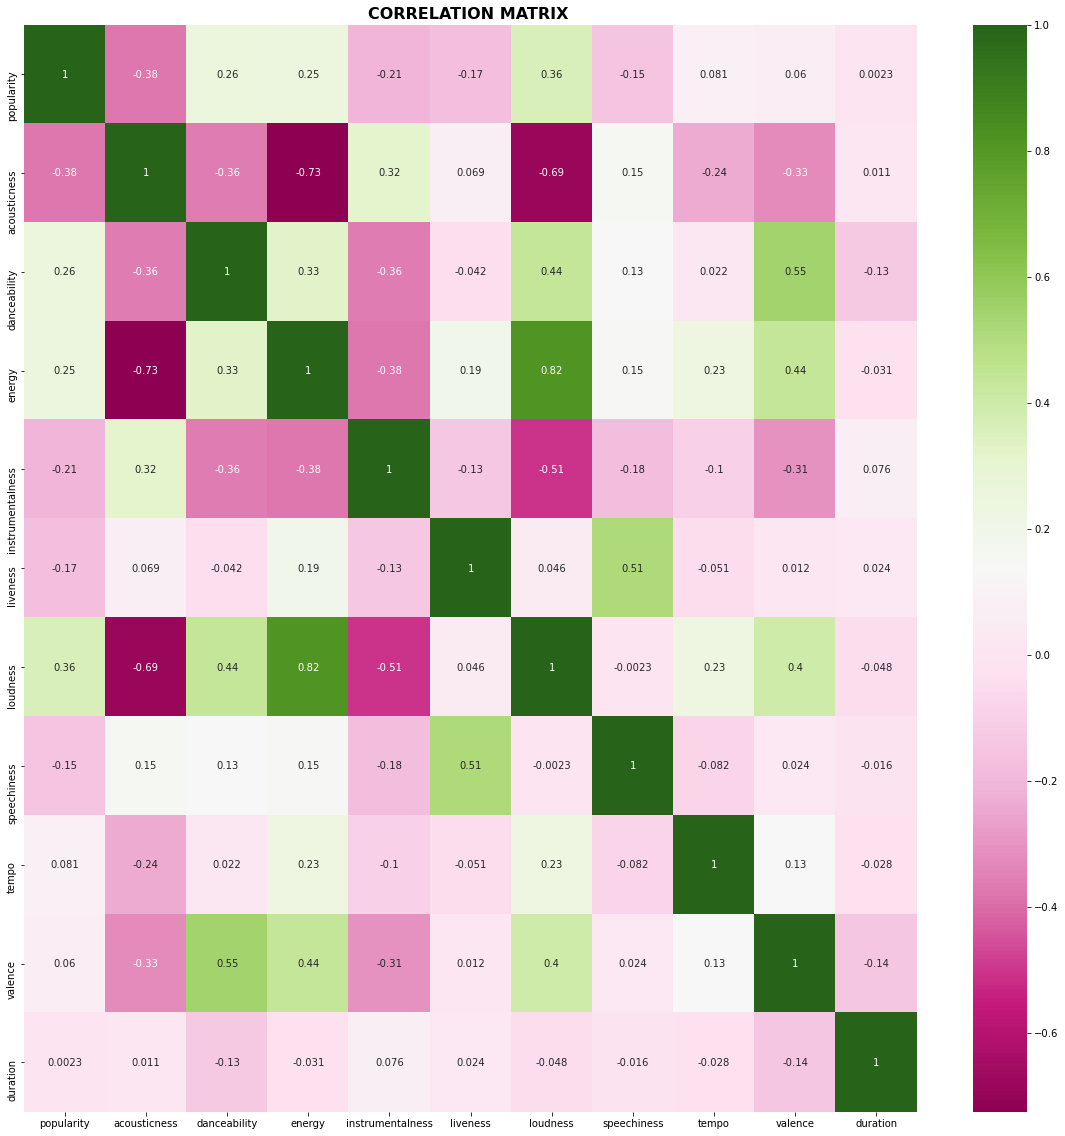

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='PiYG', annot = True)
plt.title("CORRELATION MATRIX ", fontweight = "bold", fontsize=16)

# Let's make a small sample of this dataframe

In [14]:
sample_df = df.sample(int(0.004*len(df)))
len(sample_df)

930

# We found that there is high correlation between energy and loudiness. Let's plot it (regression plot)

[Text(0.5, 1.0, 'energy vs lodness correlation')]

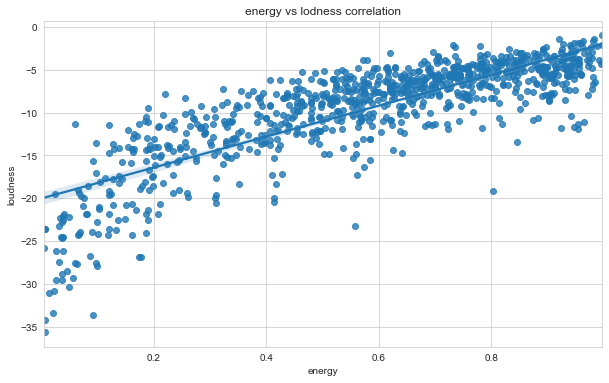

In [69]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.regplot(data=sample_df, x = "energy", y ="loudness").set(title ="energy vs lodness correlation")



# loudness vs popularity

[Text(0.5, 1.0, 'popularity vs lodness correlation')]

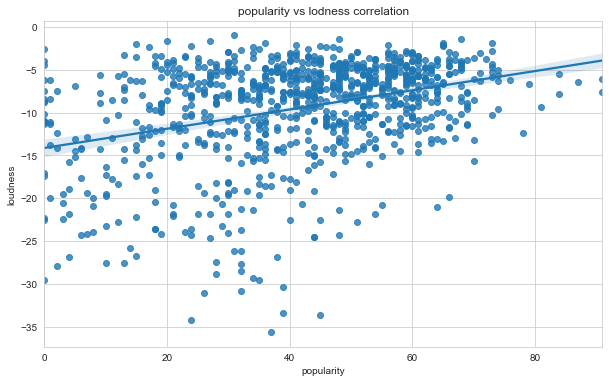

In [70]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.regplot(data=sample_df, x = "popularity", y ="loudness").set(title ="popularity vs lodness correlation")

# loudness vs acousticness

[Text(0.5, 1.0, 'acousticeness vs lodness correlation')]

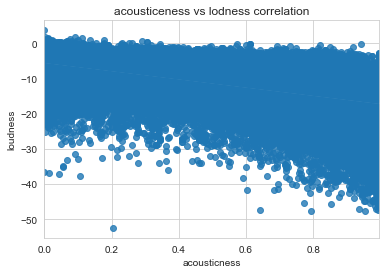

In [72]:
sns.set_style('whitegrid')
sns.regplot(data=df, x = "acousticness", y ="loudness").set(title ="acousticeness vs lodness correlation")

negative relation

# no of songs per year - histogram

In [ ]:
df["dates"] = df.index.get_level_values("release date")
df["dates"] = pd.to_datetime(df.dates)
years = df.dates.dt.year

In [ ]:
sns.displot(years, discrete=True,aspect=2, height = 5, kind=hist).set(title=no of songs per year)

# duration of songs over year - barplot

In [ ]:
total_dur = df["duration"]
fif_dim = (18,7)
fig, ax = plt.subplots(figsize="fig_dim")
fig = sns.barplot(x='years', y="total_dur", ax=ax, errwidth = False).set(title = "duration over year")
plt.xticks(rotation=90)

# duration of songs over year - lineplot


In [ ]:
total_dur = df["duration"]
sns.set_style(style="whitegrid")
fif_dim = (18,7)
fig, ax = plt.subplots(figsize="fig_dim")
fig = sns.lineplot(x='years', y="total_dur", ax=ax, errwidth = False).set(title = "duration over year")
plt.xticks(rotation=90)

# Duration of songs in different genre

Text(0.5, 0, 'duration')

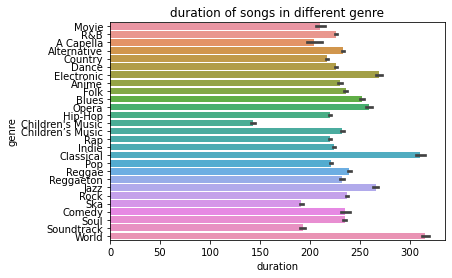

In [25]:
plt.title("duration of songs in different genre")
sns.color_palette("rocket", as_cmap=True)
sns.barplot(x="duration", y="genre", data= df)
plt.ylabel("genre")
plt.xlabel("duration")

# Top 5 genre by popularity

[Text(0.5, 1.0, 'top5 genres on the basis of popularity')]

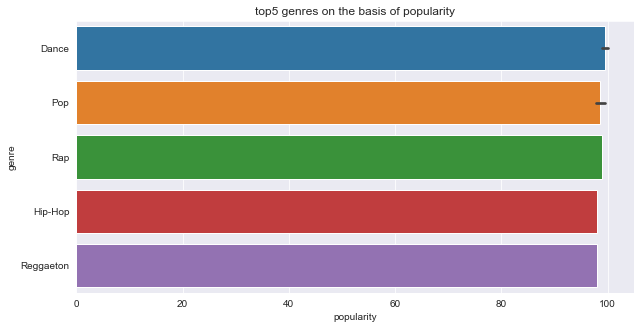

In [59]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(10,5))
famous = df.sort_values("popularity", ascending=False).head(10)
sns.barplot(x='popularity', y="genre", data=famous).set(title = "top5 genres on the basis of popularity")

# Top 5 most popular artist

In [5]:
popular_artist = df.groupby("artist_name").count().sort_values(by="track_name", ascending=False)["track_name"][:5]
popular_artist

artist_name
Giuseppe Verdi            1394
Giacomo Puccini           1137
Kimbo Children's Music     971
Nobuo Uematsu              825
Richard Wagner             804
Name: track_name, dtype: int64

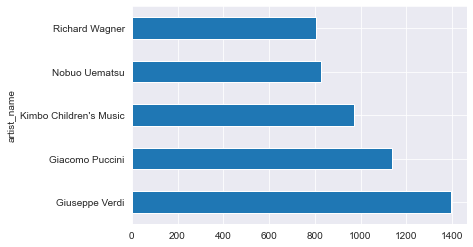

In [11]:
popular_artist.plot.barh()
plt.show()

# Top 5 loudest tracks

In [21]:
loudest_track = df[["loudness", "track_name"]].sort_values("loudness", ascending=True)[:5]
loudest_track

,loudness,track_name
218717,-52.457,Call to Wake
218540,-47.669,Neroli
126046,-47.599,"La Damnation de Faust, Op. 24, H. 111: Pt. II,..."
203063,-47.499,Limes - Instrumental
126602,-47.432,"Variations On A Theme Of Chopin, Op.22: Variat..."


Text(0.5, 0, 'loudness')

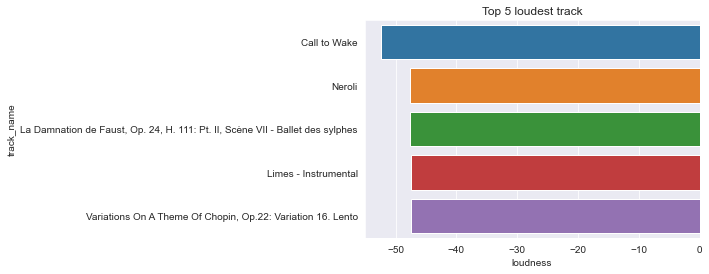

In [23]:
plt.title("Top 5 loudest track")
sns.color_palette("rocket", as_cmap=True)
sns.barplot(x="loudness", y="track_name", data= loudest_track)
plt.ylabel("track_name")
plt.xlabel("loudness")

# Artist with most danceability song

In [24]:
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [29]:
artist_most_dance = df[["artist_name", "danceability", "track_name"]].sort_values(by="danceability", ascending=False)[:9]
artist_most_dance

,artist_name,danceability,track_name
75396,Juice Music,0.989,Fuzzy Wuzzy
75762,Juice Music,0.987,I've Been Everywhere
26911,Quantic,0.987,Sol Clap
178675,Quantic,0.987,Sol Clap
90205,Pitbull,0.986,Go Girl
23822,Nu,0.985,Who Loves the Sun
92402,Wifisfuneral,0.982,LoyaltyRunsDeepInDaLongRun
75477,Juice Music,0.981,Baby Elephant Walk
75388,Juice Music,0.981,Spaghetti Bolognaise


Text(0.5, 0, 'danceability')

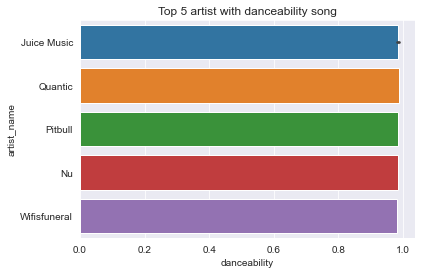

In [30]:
plt.title("Top 5 artist with danceability song")
sns.color_palette("rocket", as_cmap=True)
sns.barplot(x="danceability", y="artist_name", data= artist_most_dance)
plt.ylabel("artist_name")
plt.xlabel("danceability")

# Top 10 instrumentalness songs

In [36]:
top_instrumentalness_song = df[["instrumentalness", "track_name", "artist_name" ]].sort_values("instrumentalness", 
                                                                                               ascending=False)[:5]
top_instrumentalness_song

,instrumentalness,track_name,artist_name
199660,0.999,"Opening Titles - From ""Jurassic Park"" Soundtrack",John Williams
203562,0.998,I Know What I Saw,Kyle Dixon & Michael Stein
31144,0.997,Kingdom of Burmecia,Nobuo Uematsu
76749,0.997,My Bonnie Lies Over the Ocean - Instrumental,Children Songs Company
34781,0.996,スリルのテーマ 〜サスペンス,Capcom Sound Team


Text(0.5, 0, 'instrumentalness')

C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12522 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12523 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  fon

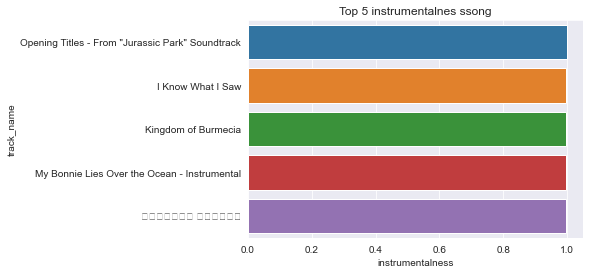

In [37]:
plt.title("Top 5 instrumentalnes ssong")
sns.color_palette("rocket", as_cmap=True)
sns.barplot(x="instrumentalness", y="track_name", data= top_instrumentalness_song)
plt.ylabel("track_name")
plt.xlabel("instrumentalness")

# pie-chart visualization

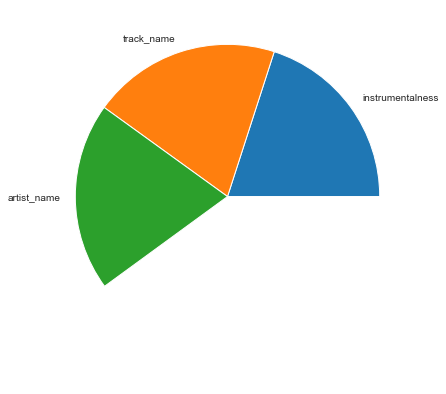

In [42]:
plt.figure(figsize=(12,7))
plt.pie(x="instrumentalness", data = top_instrumentalness_song, labels=top_instrumentalness_song.index)
plt.show()

In [45]:
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


<AxesSubplot:xlabel='loudness', ylabel='Count'>

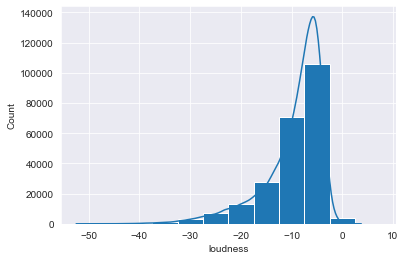

In [54]:
sns.histplot(data =df, x = "loudness", bins=10, binwidth = 5, alpha =1,
            kde=True)

# Multiple feature plots

In [44]:
interested_feature_cols = ["tempo", "loudness", "danceability", "duration_ms", "energy", "instrumentalness"]
for feature_col in interested_feature_cols:
    pos_data = df[df["target"]==1][feature_col]
    neg_data = df[df["target"]==0][feature_col]
    
    plt.figure(figsize=(12, 7))
    
    sns.distplot(pos_data, bins=30, label="positive", color="green")
    sns.distplot(pos_data, bins=30, label="positive", color="green")
    
    plt.legend(loc="upper right")
    plt.title(f"positive and negative histogram plot for {feature_col}")
    plt.show()
    
    


KeyError: 'target'